In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
from env import user,password,host
import os
import wrangle

import sklearn.preprocessing
from sklearn.model_selection import train_test_split


In [44]:
df = wrangle.get_zillow_data()

csv file found and loaded



In [45]:
df.columns


Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips'],
      dtype='object')

In [46]:
wrangle.wrangle_zillow(df)

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
11,0,0.0,1200,5328,1972,91.60,LA
14,0,0.0,171,6920,1973,255.17,LA
...,...,...,...,...,...,...,...
2152857,4,4.0,4375,422400,2015,13877.56,LA
2152859,4,3.0,2262,960756,2015,13494.52,Orange
2152860,4,4.5,3127,536061,2014,6244.16,Orange
2152862,3,2.5,1974,424353,2015,5302.70,Orange


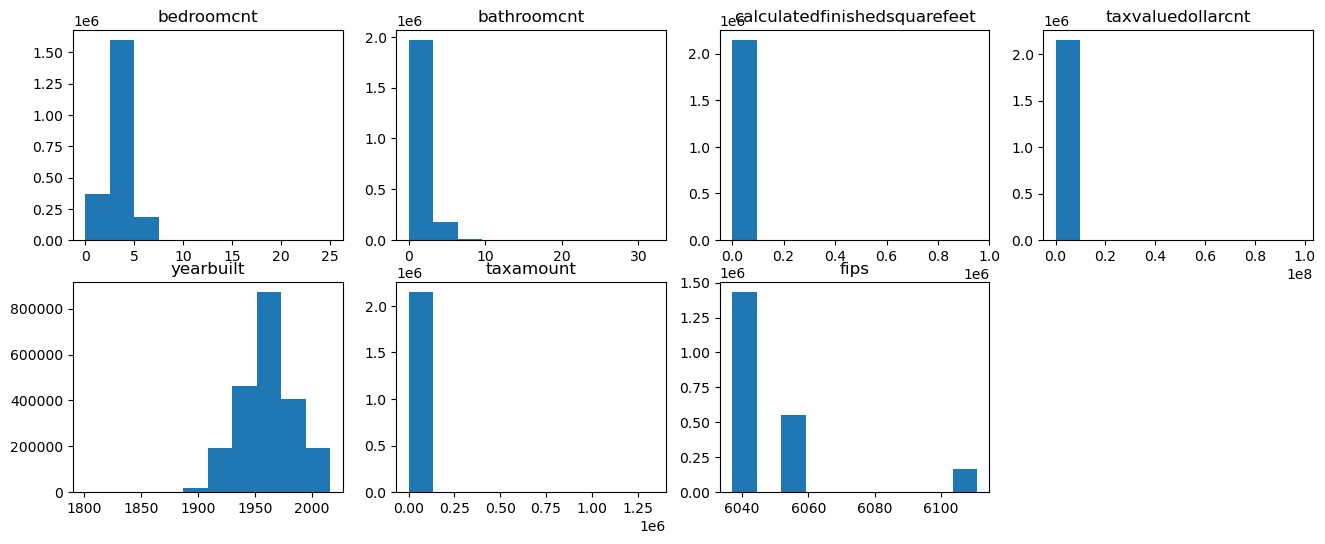

In [47]:
plt.figure(figsize=(16, 6))

for i, col in enumerate(df.columns):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(2, 4, plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    plt.hist(df[col])

plt.show()

In [48]:
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.25, random_state=123)

In [49]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1228108,3.0,2.0,1430.0,128137.0,1970.0,1826.74,6111.0
99712,3.0,1.0,1048.0,445000.0,1935.0,5611.39,6037.0
1637472,0.0,0.0,226.0,10352.0,1988.0,289.04,6037.0
1260731,3.0,1.0,1109.0,362762.0,1947.0,4392.99,6037.0
579338,2.0,1.0,1147.0,498000.0,1952.0,5950.70,6059.0


In [50]:
X_train, X_validate = train[['bedroomcnt', 'bathroomcnt','calculatedfinishedsquarefeet','yearbuilt','taxamount','fips']], validate[['bedroomcnt', 'bathroomcnt','calculatedfinishedsquarefeet','yearbuilt','taxamount','fips']]



In [51]:
X_train

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxamount,fips
1228108,3.0,2.0,1430.0,1970.0,1826.74,6111.0
99712,3.0,1.0,1048.0,1935.0,5611.39,6037.0
1637472,0.0,0.0,226.0,1988.0,289.04,6037.0
1260731,3.0,1.0,1109.0,1947.0,4392.99,6037.0
579338,2.0,1.0,1147.0,1952.0,5950.70,6059.0
...,...,...,...,...,...,...
330866,3.0,2.0,1174.0,1955.0,822.30,6059.0
841555,3.0,2.0,1264.0,1954.0,871.49,6037.0
943078,4.0,3.0,3197.0,1974.0,6815.09,6037.0
1486320,4.0,2.5,2173.0,1984.0,3980.96,6111.0


In [52]:
y_train, y_validate = train.taxvaluedollarcnt, validate.taxvaluedollarcnt

Text(0.5, 1.0, 'Scaled')

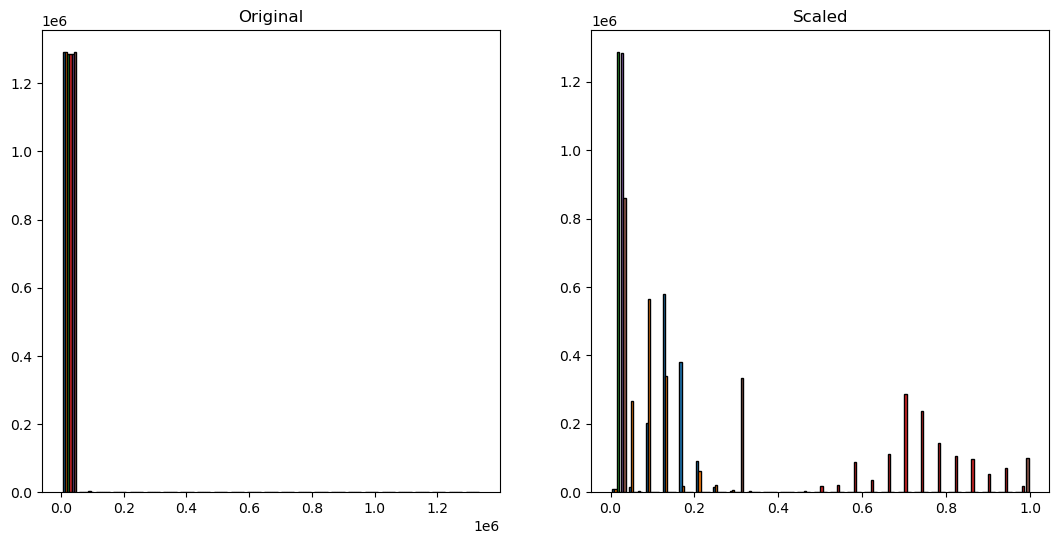

In [40]:
#MINMAX
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
#X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')


Text(0.5, 1.0, 'Scaled')

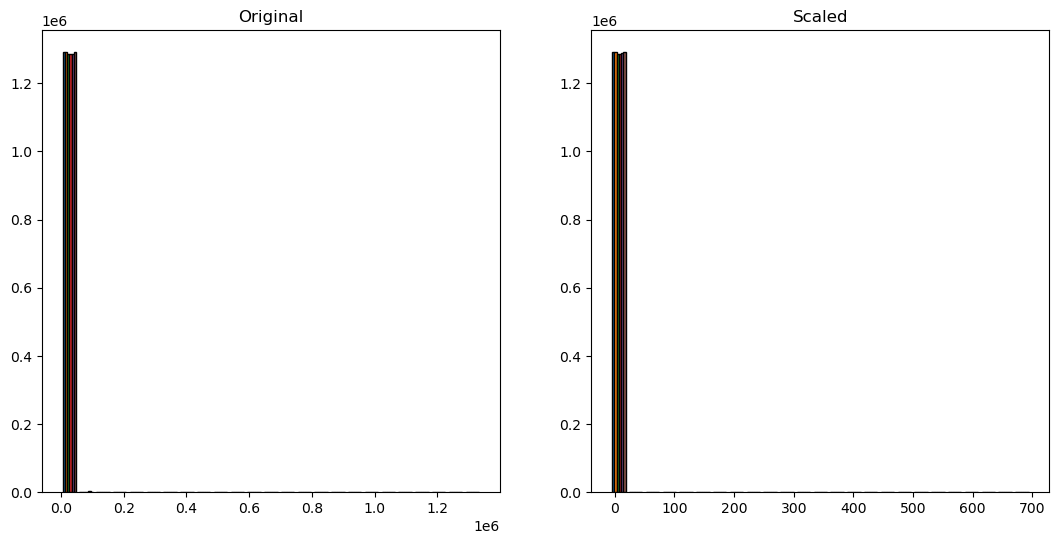

In [41]:
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
#X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

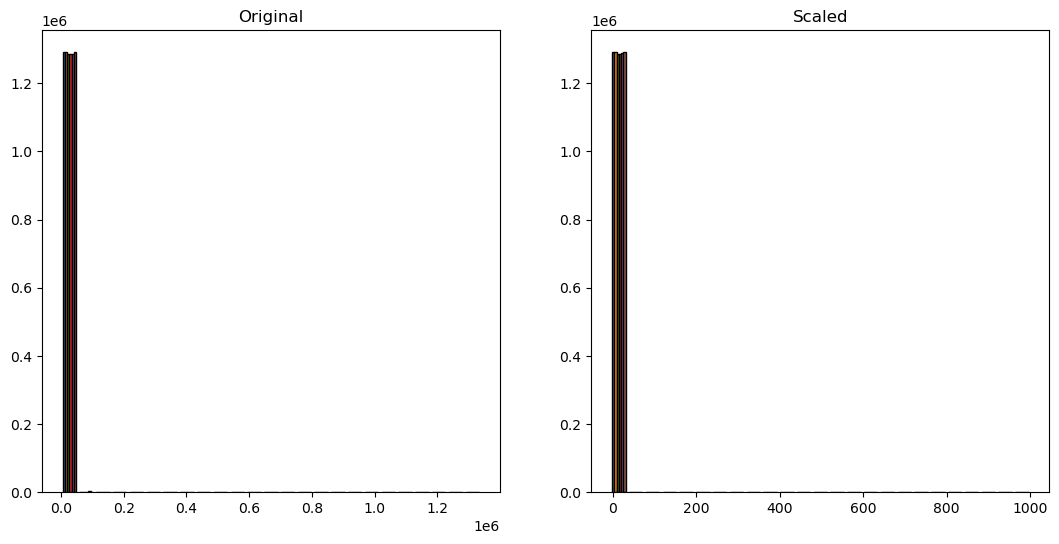

In [53]:
#Robust
scaler = sklearn.preprocessing.RobustScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
#X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')